#**Introduction**


Après avoir fait un tour sur les sites de location d'appartement, vous avez des doutes sur le loyer que vous payez chaque mois.
Pour avoir une idée plus factuelle vous avez décidé de collecter les prix et les caractéristiques des appartements.

Vous aimeriez répondre à cette question : 
***Étant donné les caractéristiques de mon appartement, combien devrais-je normalement payer mon loyer ?***




# **Collecte des données**


En utilisant les techniques de ***web crawling***  vous avez pu collecter un ensemble de données. Vous avez également trouvez sur open Data un ensemble de données. https://www.data.gouv.fr/fr/datasets/resultats-nationaux-des-observatoires-locaux-des-loyers/



*Quelles sont les autres techniques de collecte que vous connaisez ?*

# **Nettoyage des données**

Avant de commencer votre étude vous avez nettoyé vos données pour supprimer les données incomplètes.
Vous aviez collecté tellement de données que vous aggragé les données.


Voici un lien vers les données.
https://raw.githubusercontent.com/elomedah/iris-2020/main/Base_OP_2019_Nationale.csv

*Decrivez les données ?*

# **Exploration des données**


Dans cette partie vous allez explorer les données.
Combien de lignes avez vous collecté ?


In [127]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# On charge le dataset
house_data = pd.read_csv('https://raw.githubusercontent.com/elomedah/iris-2020/main/Base_OP_2019_Nationale.csv', delimiter=';',encoding='iso-8859-1')
#Apercu du dataset
house_data.describe()

In [ ]:
# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface_moyenne'], house_data['moyenne_loyer_mensuel'], 'ro', markersize=2)
plt.title("Nuage des points de la surface par le logyer mensuel")
plt.xlabel("Surface")
plt.ylabel("Prix mensuel")
plt.show()

# Que remarquez-vous ?

In [ ]:
#Filtrage des données
#Filter sur les données <  1600
house_data_cleaned = house_data[house_data['moyenne_loyer_mensuel'] < 1800 ]
#house_data_cleaned = house_data_cleaned[house_data_cleaned["agglomeration"].str.contains("Marseille",na=False )]
#house_data_cleaned = house_data_cleaned[house_data_cleaned["agglomeration"].str.startswith("Appart",na=False )]
plt.plot(house_data_cleaned['surface_moyenne'], house_data_cleaned['moyenne_loyer_mensuel'], 'ro', markersize=4)
plt.title("Nuage des points de la surface par le logyer mensuel (renettoyée)")
plt.xlabel("Surface")
plt.ylabel("Prix mensuel")
plt.show()

Vous avez decidé d'utiliser une technique de machine learning.
Quelle technique allez-vous utiliser ? Cherchez-vous une valeur continue ou discrète ?






# **Modélisation**

La regression linéaire de la librairie scikit-learn
`y = ax + b`

In [143]:
#Import de la librairie scikit-learn
from sklearn import linear_model

In [ ]:
# Definition des données d'entrainement et de validation => Training dataset / Validation dataset
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.array( house_data_cleaned['surface_moyenne']).reshape(-1,1)
y = np.array(house_data_cleaned['moyenne_loyer_mensuel'])

# Split the data into training/testing sets
X_train = X[:round(len(house_data_cleaned)*0.8)]
X_test = X[round(len(house_data_cleaned)*0.8):]

# Split the targets into training/testing sets
y_train = y[:round(len(house_data_cleaned)*0.8)]
y_test = y[round(len(house_data_cleaned)*0.8):]

X

In [172]:
# Entrainer le modèle
regr = linear_model.LinearRegression()
regr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
#Prediction
y_pred = regr.predict(X_test)

#**Evaluation et interpretation**

In [175]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))



Coefficients: 
 [5.62659344]
Mean squared error: 2129.82
Coefficient of determination: 0.87


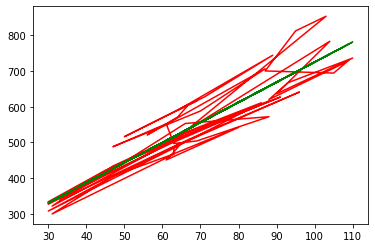

In [177]:
# Plot outputs

plt.plot(X_test[:,0], y_test,  color='r')
plt.plot(X_test[:,0], y_pred, color='g')


plt.show()

Votre modèle est il performant ?
Que proposez vous pour améliorer votre modèle ?
Filtrez les données sur les villes ?
Filtrez les données sur le type d'habitation ?

# Conclusion

In [ ]:
#Prediction du loyer
#Si vous avez une surface de 50m2
X_to_predict=[[50]]
y_predicted=regr.predict(X_to_predict)
y_predicted